In [3]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

# 解决中文乱码问题
# plt.rcParams['font.sans-serif'] = ['Simhei']
# from wordcloud import WordCloud,ImageColorGenerator
# import imageio
# import snownlp
# from snownlp import SnowNLP

In [2]:
# 标准化日期，获取时间的“年、月、日”
import datetime
def change_date(s):
    s = datetime.datetime.strptime(s, "%Y/%m")  # 把日期标准化，转化结果如：2015/1/4 => 2015-01-04 00:00:00
    s = str(s)  # 上一步把date转化为了时间格式，因此要把date转回str格式
    return s[:7] # 只获取年月日，即“位置10”之前的字符串

## （1）数据预处理

### 1.1 dsr表

In [3]:
dsr = pd.read_csv("./dsr.csv", names=['卖家', '买家', '服务得分', '发货得分', '物流得分', '商品得分', '月'])
dsr.fillna(dsr.mean(), inplace=True)
# dsr['月'] = dsr['月'].map(change_date) 

In [4]:
dsr

,卖家,买家,服务得分,发货得分,物流得分,商品得分,月
0,48998560,306543842,4.0,4.0,4.000000,4.0,7
1,374037408,195474257,5.0,5.0,5.000000,5.0,7
2,82199680,127354136,5.0,5.0,5.000000,5.0,7
3,118112096,396642295,5.0,5.0,5.000000,5.0,7
4,136529552,62722067,5.0,5.0,5.000000,5.0,7
...,...,...,...,...,...,...,...
1048571,26263758,122700222,5.0,5.0,5.000000,5.0,6
1048572,23791406,390297235,5.0,4.0,4.000000,5.0,6
1048573,259204750,49346490,5.0,5.0,5.000000,5.0,6
1048574,142846846,43177588,4.0,4.0,4.682761,4.0,6


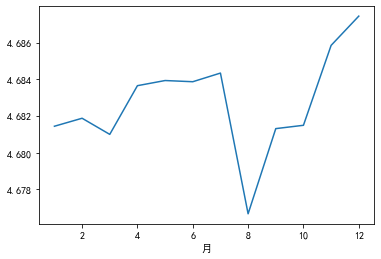

In [5]:
logistics_score = dsr.groupby('月')['物流得分'].mean().plot()

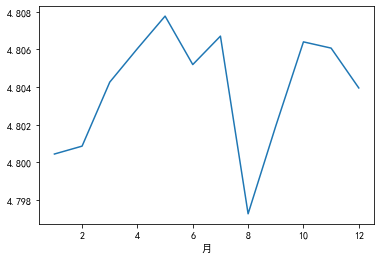

In [6]:
fahuo_score = dsr.groupby('月')['发货得分'].mean().plot()

### 1.2 rate表

In [7]:
rate = pd.read_csv("./rate.csv", names=['卖家', '评分', '时'])

rate

,卖家,评分,时
0,324483386,1,12
1,220103187,1,13
2,91442227,1,21
3,168720990,1,18
4,22598031,1,13
...,...,...,...
1048571,281829105,1,10
1048572,12556059,1,15
1048573,23678852,1,15
1048574,103488395,1,19


评分标准分为1/0/-1，分别代表好/中/差评

In [8]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   卖家      1048576 non-null  int64
 1   评分      1048576 non-null  int64
 2   时       1048576 non-null  int64
dtypes: int64(3)
memory usage: 24.0 MB


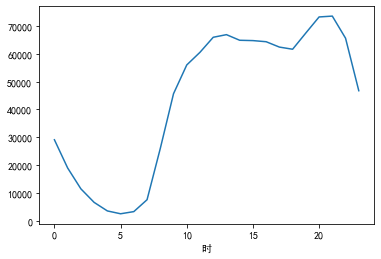

In [9]:
time_score = rate.groupby('时')['评分'].count().plot()


### 1.3 trans表

In [10]:
trans = pd.read_csv("./trans.csv", names=['卖家', '差额'])  # 差额为 实际支付金额-单价*数量
trans

,卖家,差额
0,273709971,0.00
1,88771149,3.75
2,48139054,0.00
3,78970116,1.54
4,240259672,0.00
...,...,...
1048571,50979897,1.17
1048572,10481271,0.00
1048573,118996501,10.00
1048574,37697045,2.04


In [11]:
tmp = trans.groupby('卖家')['差额'].sum()
result = pd.DataFrame({'卖家':tmp.index, '异常值':tmp.values})
result = result.set_index('卖家')
result

,异常值
卖家,
1135,13161.06
6867,7983.75
11459,298.12
27101,6.00
41690,13.80
...,...
380225356,0.00
380380373,651.74
380767569,1414.53


### 1.4 user表

In [12]:
user = pd.read_csv("./user.csv", names=['卖家', '销售评级', '销售时长', '总交易笔数'])

user = user.set_index('卖家')
user

,销售评级,销售时长,总交易笔数
卖家,,,
58132009,7,1294,747
72196798,8,1090,1692
60800412,1,890,10
26661495,2,1794,31
74320844,5,967,240
...,...,...,...
36765190,7,1019,642
380854382,6,216,335
12926899,2,435,36


In [13]:
df = pd.concat([user, result], axis=1)
df

,销售评级,销售时长,总交易笔数,异常值
卖家,,,,
1135,5,310,236,13161.06
5706,9,565,2382,NaN
6679,3,1717,88,NaN
6867,10,2683,7183,7983.75
11459,9,2670,2382,298.12
...,...,...,...,...
380767569,8,216,1296,1414.53
380815129,1,216,6,NaN
380854382,6,216,335,691.82


In [14]:
# 对缺失值进行0补充

df.fillna(0, inplace=True)

df

,销售评级,销售时长,总交易笔数,异常值
卖家,,,,
1135,5,310,236,13161.06
5706,9,565,2382,0.00
6679,3,1717,88,0.00
6867,10,2683,7183,7983.75
11459,9,2670,2382,298.12
...,...,...,...,...
380767569,8,216,1296,1414.53
380815129,1,216,6,0.00
380854382,6,216,335,691.82


In [15]:
df['异常值'] = df['异常值'].astype('int')

df

,销售评级,销售时长,总交易笔数,异常值
卖家,,,,
1135,5,310,236,13161
5706,9,565,2382,0
6679,3,1717,88,0
6867,10,2683,7183,7983
11459,9,2670,2382,298
...,...,...,...,...
380767569,8,216,1296,1414
380815129,1,216,6,0
380854382,6,216,335,691


In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 模型创建、训练，选取最优聚类参数K
scores = [ ]
range_values = np.arange(2, 10)
for i in range_values:
    kmeans = KMeans(init='k-means++', n_clusters=i)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=len(X)) #计算得分
    scores.append(score)
    
# 绘制出得分结果
plt.figure()
plt.bar(range_values, scores, width=0.6, color='b', align='center')
plt.title('Silhouette score')
plt.show()

NameError: name 'X' is not defined

从表中可以看出，当聚类数目为2时，得分最高

In [17]:
#模型训练
from sklearn.cluster import KMeans
Kmodol=KMeans(2)
Kmodol.fit(df)
df['类别']=Kmodol.labels_
# data=data.rename(columns={0:'L',1:'R',2:'F',3:'M'})
df

,销售评级,销售时长,总交易笔数,异常值,类别
卖家,,,,,
1135,5,310,236,13161,0
5706,9,565,2382,0,0
6679,3,1717,88,0,0
6867,10,2683,7183,7983,0
11459,9,2670,2382,298,0
...,...,...,...,...,...
380767569,8,216,1296,1414,0
380815129,1,216,6,0,0
380854382,6,216,335,691,0


In [18]:
df.groupby('类别')['类别'].count()

类别
0    15969
1        7
Name: 类别, dtype: int64

In [19]:
#引入画图的包
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')


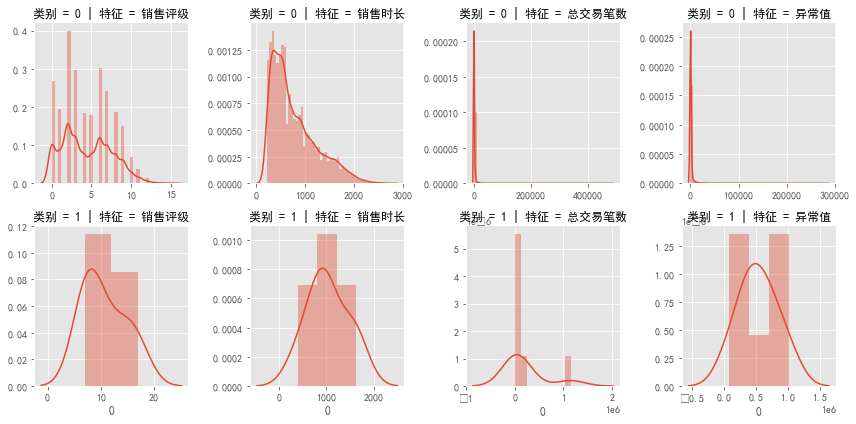

In [20]:
data_X=df.set_index('类别').stack().reset_index().rename(columns={'level_1':'特征'})
g = sns.FacetGrid(data_X, row="类别",col='特征',sharex=False,sharey=False)
g.map(sns.distplot,0)